In [2]:
import pandas as pd

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [4]:
y=pd.read_csv("AAPL_quarterly_financials.csv")

In [5]:
y.index=y.name

In [6]:
y=pd.DataFrame(y.loc["BasicEPS",:]).iloc[2:,:]

In [7]:
y

,BasicEPS
09/30/2023,1.47
06/30/2023,1.27
03/31/2023,1.53
12/31/2022,1.89
09/30/2022,1.29
...,...
09/30/1986,NaN
06/30/1986,0.002
03/31/1986,0.002
12/31/1985,0.004


In [8]:
y.index=pd.to_datetime(y.index)

In [9]:
y=y.fillna(0.)

In [10]:
y

,BasicEPS
2023-09-30,1.47
2023-06-30,1.27
2023-03-31,1.53
2022-12-31,1.89
2022-09-30,1.29
...,...
1986-09-30,0.0
1986-06-30,0.002
1986-03-31,0.002
1985-12-31,0.004


# 2.) Normalize all the X data

In [13]:
from pytrends.request import TrendReq

In [30]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["Phone", "Apple Layoffs","MacBook","iPad","Apple CEO","Apple Share Price",
            "Recession","Chip Costs","Taylor Swift Tickets","Samsung","Hospital"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [31]:
X = df.resample("Q").mean()
temp = pd.concat([y,X],axis=1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [33]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

In [34]:
lasso=Lasso(alpha=.1)

In [35]:
lasso.fit(X_scaled,y)

Lasso(alpha=0.1)

In [36]:
coefficients=lasso.coef_

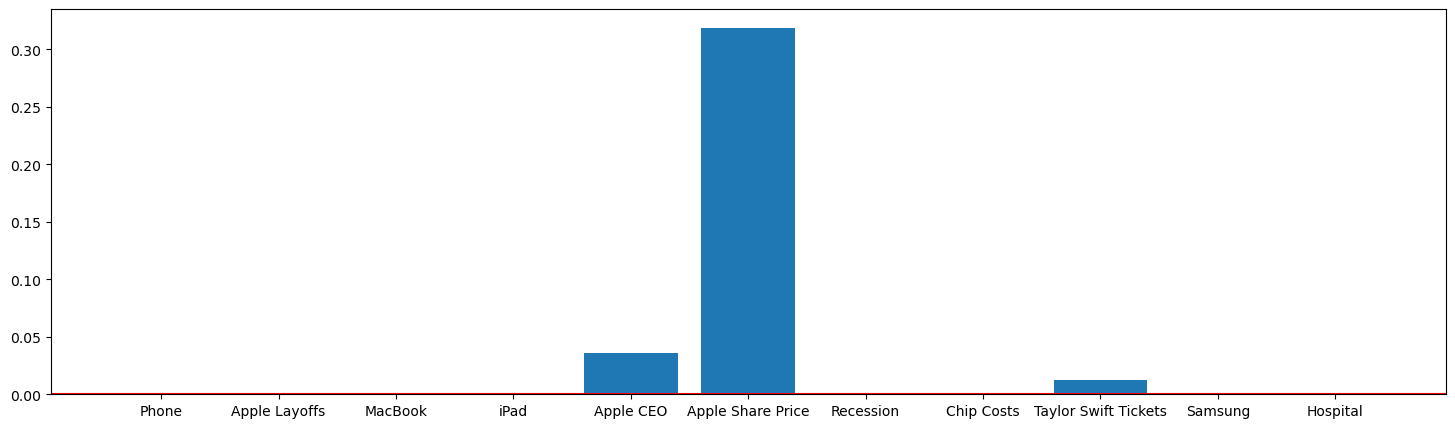

In [37]:
plt.figure(figsize = (18,5))
plt.bar(range(len(coefficients)),coefficients,tick_label=X.columns)
plt.axhline(0.,color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

The keywords「Apple CEO」and 「Apple Share Price」makes sense as they have positive impact on the sales of Apple devices.However,「Taylor Swift Tickets」may be a little bit confusing.The possible explaination is that 「Taylor Swifts Tickets」 may to some extent reflect people's spare money.

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.

# 7.) Run a cross validation. What is your ideal lambda?